Using information available on International Monetary Fund website.

- https://data.imf.org/?sk=4FFB52B2-3653-409A-B471-D47B46D904B5


Information from the **Consumer Price Index manual - Concepts and Methods**.

###Consumer Price Index (CPI)

CPI measure changes over time in the general level of prices of good and services that households acquire for the purpose of consumption. They were originally introduced in some countries to increase wages for workers in order to balance the increase of the living costs (given by the CPI). Currently is used widely by governments and central banks as a macroeconomic indicator of inflation.

###Weights

The CPI is usually calculated as a weighted average of the relative price change of the goods and services covered in it. The weights attached to each good or service reflect their relative importance as measured by their shares in the total consumption of all households. It determines the impact that its price change will have on the overall index.

For example, let's imagine transportation has higher weight than health. The same price change on both categories will make that transportation will contribute more on the CPI.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_year=pd.read_excel('CrossCountry_Harmonized_Indexes_Yea.xlsx', header=2)
df_period=pd.read_excel('CrossCountry_Harmonized_Indexes_Per.xlsx', header=2)
df_weight=pd.read_excel('CrossCountry_Harmonized_Weights_as_.xlsx', header=2)

In [ ]:
for df in [df_year, df_period, df_weight]:
  df.rename(columns={list(df)[0]:'Country',list(df)[1]:'Category'}, inplace=True)
df_year

,Country,Category,1997M01,1997M02,1997M03,1997M04,1997M05,1997M06,1997M07,1997M08,1997M09,1997M10,1997M11,1997M12,1998M01,1998M02,1998M03,1998M04,1998M05,1998M06,1998M07,1998M08,1998M09,1998M10,1998M11,1998M12,1999M01,1999M02,1999M03,1999M04,1999M05,1999M06,1999M07,1999M08,1999M09,1999M10,1999M11,1999M12,2000M01,2000M02,...,2018M10,2018M11,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11,2020M12,2021M01,2021M02,2021M03,2021M04,2021M05,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01
0,Austria,"Consumer Price Index, All items, Harmonized, P...",1.205495,1.411600,1.198272,1.213558,1.312483,1.002227,0.903908,1.311201,1.213558,1.099666,1.096461,0.996264,1.191136,0.978501,0.991326,1.185226,0.978501,0.785557,0.785557,0.688421,0.592613,0.688421,0.494234,0.493218,0.287435,0.204722,0.190866,0.095342,0.395796,0.191440,0.300834,0.492274,0.589122,0.779434,0.983607,1.663258,1.378463,1.947698,...,2.401076,2.272945,1.715266,1.694589,1.431041,1.675393,1.738057,1.688805,1.564574,1.364113,1.450105,1.234568,1.031701,1.200300,1.826869,2.168150,2.187293,1.582249,1.521658,0.587796,1.064326,1.769245,1.391762,1.163657,1.123283,1.121201,1.012053,1.056436,1.371386,2.018433,1.912644,2.996012,2.799076,2.811171,3.162679,3.275973,3.763885,4.114359,3.789052,4.465841
1,Austria,"Food and non-alcoholic beverages, Harmonized, ...",-0.205671,0.307918,-0.188542,0.699606,1.097454,0.904581,1.407625,2.219905,2.333583,2.312481,2.923282,2.709907,3.106139,2.777372,3.153153,2.851353,2.851353,2.053210,2.053210,1.486664,1.491010,0.985222,0.980392,0.591119,0.185608,0.483573,-0.676152,-0.858429,-0.956938,-2.011901,-2.691981,-2.053712,-1.569927,-0.774749,-0.385494,0.186327,0.783811,0.863411,...,1.106195,0.951100,0.796392,1.209213,1.131894,1.554255,1.274557,1.069417,0.955292,1.241880,1.669866,0.860997,0.751594,0.494861,0.942408,1.232695,1.896993,1.889466,2.725208,1.350968,2.810371,2.557086,2.312630,2.817035,2.653447,2.689394,2.876273,-1.142750,1.424183,1.112656,0.027634,1.696495,-0.036815,0.046002,0.479749,0.608856,1.021065,1.521579,1.558346,4.917567
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics, H...",2.325581,2.632020,1.187727,1.601717,1.588352,1.486129,1.788672,1.598550,1.898943,1.798086,1.889920,0.490998,0.604971,0.506370,0.505380,0.000000,0.504886,0.406769,0.504393,0.291971,0.097229,-0.097229,1.578262,1.384365,1.657728,1.267674,1.265207,1.072647,1.069519,1.361206,1.165614,1.067443,1.068480,1.167883,0.384431,0.289157,0.191847,1.941903,...,3.699149,3.652058,3.531194,1.800709,1.920567,1.605462,1.479153,1.303022,0.484151,0.547345,0.300738,0.621175,0.529149,0.933468,0.512070,1.466410,1.692280,0.835452,1.785552,1.158548,0.818182,0.217746,0.708704,0.735361,2.005627,1.840602,0.372999,1.345859,0.503733,1.783141,1.244071,2.615204,2.930568,3.738910,3.311079,3.271449,1.708185,2.154558,3.281066,2.076649
3,Austria,"Clothing and footwear, Harmonized, Percentage ...",-2.600878,-1.796407,-1.390953,-0.889265,-0.887574,-0.995130,-2.331634,-0.308031,0.000000,0.192267,0.202149,-0.095755,-0.208791,-1.219512,-0.710671,-0.405896,-0.191898,-0.502566,-0.932712,0.110351,0.302115,0.405117,0.594606,0.692226,0.099108,0.617284,0.715758,0.900901,0.598163,0.913487,1.782112,0.099206,0.000000,0.000000,0.189994,0.296140,-0.198020,1.226994,...,-0.353069,-0.242675,0.819896,1.165354,-1.017272,0.795731,0.138735,1.165610,-0.390737,0.841639,2.477656,0.946284,1.589897,0.639697,0.939731,2.054795,1.530885,0.315780,0.138543,-2.617753,-1.769996,3.547112,-1.346876,-0.514659,-0.384547,-0.188004,-1.092114,2.460850,-1.739772,-1.583187,0.202915,2.565073,4.568034,3.011984,3.871979,0.424942,-0.691265,-0.026908,0.217214,-0.893212
4,Austria,"Housing, Water, Electricity, Gas and Other Fue...",5.222203,5.211389,4.787326,4.674343,4.571232,3.010316,2.591284,2.480308,1.982672,1.654533,1.565848,1.564301,1.364010,0.869280,0.969597,0.968642,0.969597,1.067148,0.967689,0.

In [ ]:
df_melt_year = pd.melt(df_year, id_vars=['Country', 'Category'], value_vars=list(df_year)[2:])
df_melt_period = pd.melt(df_period, id_vars=['Country', 'Category'], value_vars=list(df_period)[2:])
df_melt_weight = pd.melt(df_weight, id_vars=['Country', 'Category'], value_vars=list(df_weight)[2:])

df_melt_year.rename(columns={'variable':'Year'}, inplace=True)
df_melt_period.rename(columns={'variable':'Year'}, inplace=True)
df_melt_weight.rename(columns={'variable':'Year'}, inplace=True)

df_melt_year

,Country,Category,Year,value
0,Austria,"Consumer Price Index, All items, Harmonized, P...",1997M01,1.205495
1,Austria,"Food and non-alcoholic beverages, Harmonized, ...",1997M01,-0.205671
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics, H...",1997M01,2.325581
3,Austria,"Clothing and footwear, Harmonized, Percentage ...",1997M01,-2.600878
4,Austria,"Housing, Water, Electricity, Gas and Other Fue...",1997M01,5.222203
...,...,...,...,...
129124,Euro Area,"Communication, Harmonized, Percentage change, ...",2022M01,-0.373892
129125,Euro Area,"Recreation and culture, Harmonized, Percentage...",2022M01,2.823093
129126,Euro Area,"Education, Harmonized, Percentage change, Prev...",2022M01,-0.878419
129127,Euro Area,"Restaurants and hotels, Harmonized, Percentage...",2022M01,4.075987


In [ ]:
for df_melt in [df_melt_year, df_melt_period, df_melt_weight]:
  df_melt['Country'] = df_melt['Country'].astype('string')
  df_melt['Category'] = df_melt['Category'].astype('string')
  df_melt[['Year', 'Month']] = df_melt['Year'].astype('string').str.split('M', expand=True).astype('int')
df_melt_year

,Country,Category,Year,value,Month
0,Austria,"Consumer Price Index, All items, Harmonized, P...",1997,1.205495,1
1,Austria,"Food and non-alcoholic beverages, Harmonized, ...",1997,-0.205671,1
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics, H...",1997,2.325581,1
3,Austria,"Clothing and footwear, Harmonized, Percentage ...",1997,-2.600878,1
4,Austria,"Housing, Water, Electricity, Gas and Other Fue...",1997,5.222203,1
...,...,...,...,...,...
129124,Euro Area,"Communication, Harmonized, Percentage change, ...",2022,-0.373892,1
129125,Euro Area,"Recreation and culture, Harmonized, Percentage...",2022,2.823093,1
129126,Euro Area,"Education, Harmonized, Percentage change, Prev...",2022,-0.878419,1
129127,Euro Area,"Restaurants and hotels, Harmonized, Percentage...",2022,4.075987,1


In [ ]:
df_melt_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129129 entries, 0 to 129128
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Country   129129 non-null  string 
 1   Category  129129 non-null  string 
 2   Year      129129 non-null  int64  
 3   value     127054 non-null  float64
 4   Month     129129 non-null  int64  
dtypes: float64(1), int64(2), string(2)
memory usage: 4.9 MB


In [ ]:
df_melt_year.drop(df_melt_year[df_melt_year['Month'] > 1].index.tolist(), inplace=True)
df_melt_weight.drop(df_melt_weight[df_melt_weight['Month'] > 1].index.tolist(), inplace=True)
df_melt_year

,Country,Category,Year,value,Month
0,Austria,"Consumer Price Index, All items, Harmonized, P...",1997,1.205495,1
1,Austria,"Food and non-alcoholic beverages, Harmonized, ...",1997,-0.205671,1
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics, H...",1997,2.325581,1
3,Austria,"Clothing and footwear, Harmonized, Percentage ...",1997,-2.600878,1
4,Austria,"Housing, Water, Electricity, Gas and Other Fue...",1997,5.222203,1
...,...,...,...,...,...
129124,Euro Area,"Communication, Harmonized, Percentage change, ...",2022,-0.373892,1
129125,Euro Area,"Recreation and culture, Harmonized, Percentage...",2022,2.823093,1
129126,Euro Area,"Education, Harmonized, Percentage change, Prev...",2022,-0.878419,1
129127,Euro Area,"Restaurants and hotels, Harmonized, Percentage...",2022,4.075987,1


In [ ]:
for df_melt in [df_melt_year, df_melt_period, df_melt_weight]:
  df_melt['Category'] = df_melt['Category'].str.split(', Harmonized', expand=True)[0]
df_melt_year

,Country,Category,Year,value,Month
0,Austria,"Consumer Price Index, All items",1997,1.205495,1
1,Austria,Food and non-alcoholic beverages,1997,-0.205671,1
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics",1997,2.325581,1
3,Austria,Clothing and footwear,1997,-2.600878,1
4,Austria,"Housing, Water, Electricity, Gas and Other Fuels",1997,5.222203,1
...,...,...,...,...,...
129124,Euro Area,Communication,2022,-0.373892,1
129125,Euro Area,Recreation and culture,2022,2.823093,1
129126,Euro Area,Education,2022,-0.878419,1
129127,Euro Area,Restaurants and hotels,2022,4.075987,1


In [ ]:
df_melt_year.drop(columns=['Month'], inplace=True)
df_melt_weight.drop(columns=['Month'], inplace=True)
df_melt_year

,Country,Category,Year,value
0,Austria,"Consumer Price Index, All items",1997,1.205495
1,Austria,Food and non-alcoholic beverages,1997,-0.205671
2,Austria,"Alcoholic Beverages, Tobacco, and Narcotics",1997,2.325581
3,Austria,Clothing and footwear,1997,-2.600878
4,Austria,"Housing, Water, Electricity, Gas and Other Fuels",1997,5.222203
...,...,...,...,...
129124,Euro Area,Communication,2022,-0.373892
129125,Euro Area,Recreation and culture,2022,2.823093
129126,Euro Area,Education,2022,-0.878419
129127,Euro Area,Restaurants and hotels,2022,4.075987


In [ ]:
df_melt_period[(df_melt_period['Country']=='Portugal') & (df_melt_period['Category'].str.contains('All items'))]

,Country,Category,Year,value
299,Portugal,"Consumer Price Index, All items",1997,2.843674
5447,Portugal,"Consumer Price Index, All items",1998,1.582138
10595,Portugal,"Consumer Price Index, All items",1999,2.532751
15743,Portugal,"Consumer Price Index, All items",2000,1.902328
20891,Portugal,"Consumer Price Index, All items",2001,4.388409
26039,Portugal,"Consumer Price Index, All items",2002,3.656746
31187,Portugal,"Consumer Price Index, All items",2003,3.965495
36335,Portugal,"Consumer Price Index, All items",2004,2.216718
41483,Portugal,"Consumer Price Index, All items",2005,2.047492
46631,Portugal,"Consumer Price Index, All items",2006,2.706874


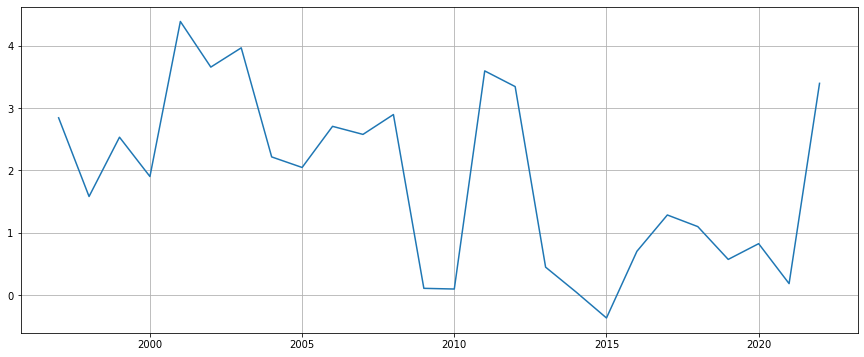

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

plt.plot(df_melt_year[(df_melt_year['Country']=='Portugal') & (df_melt_year['Category'].str.contains('All items'))]['Year'], 
         df_melt_year[(df_melt_year['Country']=='Portugal') & (df_melt_year['Category'].str.contains('All items'))]['value'])
plt.grid()
plt.show()

In [ ]:
df_melt_year.to_csv('clean_yearly_inflation.csv', index=False)
df_melt_period.to_csv('clean_period_inflation.csv', index=False)
df_melt_weight.to_csv('clean_weights.csv', index=False)

#Minimum Wage Percent Change calculation

In [10]:
df_wage = pd.read_csv('earn_mw_cur_linear.csv', delimiter=";")

In [11]:
df_wage.head()

,currency,country,Year,Month,OBS_VALUE
0,EUR,Albania,1999,7,45.12
1,EUR,Albania,2000,1,46.98
2,EUR,Albania,2000,7,52.36
3,EUR,Albania,2001,1,52.80
4,EUR,Albania,2001,7,60.13


In [12]:
df_wage = df_wage[(df_wage['currency']=='EUR') & (df_wage['Month']==1)]
df_wage.drop(columns=['Month'], inplace=True)
df_wage.drop(columns=['currency'], inplace=True)

df_wage_pivot = df_wage.pivot(index='Year', columns='country', values='OBS_VALUE')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_wage_change = df_wage_pivot.pct_change()

In [29]:
df_wage_change = df_wage_change.reset_index()
df_wage_change.head()

country,Year,Albania,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,...,Romania,Serbia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,NaN,NaN,0.019964,0.098429,NaN,NaN,0.199675,NaN,0.120040,...,-0.101794,NaN,0.358779,0.033266,0.020362,NaN,NaN,-0.055688,NaN,0.161360
2,2001,0.123883,NaN,0.020066,0.179802,NaN,NaN,0.287752,NaN,0.142825,...,0.688545,NaN,0.061586,0.058872,0.020359,NaN,NaN,0.111844,0.026443,0.079633
3,2002,0.189015,NaN,0.020002,0.271153,NaN,NaN,0.250018,NaN,0.156268,...,0.215113,NaN,0.148377,0.094352,0.020190,NaN,NaN,-0.219922,0.134928,0.055830
4,2003,0.068175,NaN,0.019978,0.095368,NaN,NaN,0.100987,NaN,0.167541,...,0.413670,NaN,0.166942,0.040866,0.020353,NaN,NaN,0.006805,-0.041008,-0.159621


In [37]:
df_wage_change = pd.melt(df_wage_change, id_vars='Year', value_vars=list(df_wage_change)[1:])

In [40]:
df_wage_change.head()

,Year,country,value
0,1999,Albania,NaN
1,2000,Albania,NaN
2,2001,Albania,0.123883
3,2002,Albania,0.189015
4,2003,Albania,0.068175


In [39]:
df_wage.head()

,country,Year,OBS_VALUE
1,Albania,2000,46.98
3,Albania,2001,52.80
5,Albania,2002,62.78
7,Albania,2003,67.06
9,Albania,2004,74.90


In [43]:
df_wage_final = df_wage.merge(df_wage_change, on=['country', 'Year'])

df_wage_final.head()

,country,Year,OBS_VALUE,value
0,Albania,2000,46.98,NaN
1,Albania,2001,52.80,0.123883
2,Albania,2002,62.78,0.189015
3,Albania,2003,67.06,0.068175
4,Albania,2004,74.90,0.116910


In [45]:
df_wage_final.to_csv('min_wage.csv')